<span style="color: blue;">

## Table of contents:
</span>

* [1. Getting familiar with the dataset](#second-bullet)
** [1.1. Data dictionary](#eight-bullet)
* [2. Exploratory data analysis](#third-bullet)
* [3. Data preparation](#fourth-bullet)
** [3.1 Encoding](#fifth-bullet)    
** [3.1 Filling missing values](#sixth-bullet)        
** [3.3 Scaling](#seventh-bullet)        
** [3.4 Principal component analysis](#8th-bullet)  
* [4. Mashine Learning Models](#ninth-bullet)    
** [3.3 Naive Bayes](#10th-bullet)        
** [3.4 Random Forest](#11th-bullet)         

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore") 

<span style="color: blue;">

## 1. Getting familiar with the dataset <a class="anchor" id="second-bullet"></a>
    
</span>


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("air_data.csv")

In [5]:
df.head(20)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,3,5,5,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,4,4,5,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,5,5,5,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,3,4,4,4,4,4,4,5,4,4,28,14.0,satisfied


In [6]:
df.shape

(129880, 25)

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df.nunique()

Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

<span style="color: blue;">

### 1.1 Data dictionary <a class="anchor" id="eight-bullet"></a>
    
</span>

__Unnamed__ - Row number.

__id__ - Passengers ID.

__Gender__ - Passenger gender.

__Customer Type__ - Is passenger loyal or disloyal.

__Age__ - Passengers age.

__Type of Travel__ - Type of travel.

__Class__  - In-flight class.

__Flight distance__ - Distance travelled.

__Inflight wifi service__ - Passenger's satisfaction with inflight wifi service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Departure/Arrival time convenient__ - Passenger's satisfaction with arrival time convinience. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Ease of Online booking__ - Passenger's satisfaction with ease of online booking system. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Gate location__  - Passenger's satisfaction with gate location. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Food and drink__ - Passenger's satisfaction with in-flight food and drink. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Online boarding__ - Passenger's satisfaction with online check in system. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Seat comfort__ - Passenger's satisfaction with seat comfort. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Inflight entertainment__ - Passenger's satisfaction with in-flight entertainment. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__On-board service__ - Passenger's satisfaction with on-board service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Leg room service__  - Passenger's satisfaction with leg room service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Baggage handling__ - Passenger's satisfaction with baggage handling. There are 5 levels. 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Checkin service__ - Passenger's satisfaction with check-in service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Inflight service__ - Passenger's satisfaction with in-flight service. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfied.

__Cleanliness__ - Passenger's satisfaction with cleanliness of the plane. There are 6 levels. 0 - No opinion, 1 - Very dissatisfied, 2 - Dissatisfied, 3 - Neutral, 4 - Satisfied, 5 - Very satisfie

__Departure Delay in Minutes__ - Was the flight late to depart.

__Arrival Delay in Minutes__ - Was the flight late to arrive.

__satisfaction__ - Overall flight satisfaction.


<span style="color: blue;">

## 2. Exploratory data analysis <a class="anchor" id="third-bullet"></a>
    
</span>

In [9]:
df.duplicated().value_counts()

False    129880
dtype: int64

In [10]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [11]:
mv = ["nan"]
df = pd.read_csv("air_data.csv", na_values=mv)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [12]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [13]:
levels_of_measurement = pd.DataFrame({"Variable": ["id", "Gender", "Customer Type", "Age", "Type of Travel",
                                                   "Class", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", 
                                                   "Ease of Online booking", "Gate location", "Food and drink", "Online boarding",
                                                  "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment",
                                                  "On-board service", "Leg room service", "Baggage handling", "Checkin service",
                                                  "Inflight service", "Cleanliness", "Departure Delay in Minutes",
                                                  "Arrival Delay in Minutes", "satisfaction"], 
                                      'LoM': ["Nominal", "Nominal", "Nominal", "Ratio", "Nominal", "Nominal", "Ratio",
                                              "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal",
                                             "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal", "Ordinal",
                                             "Ordinal", "Ordinal", "Ratio", "Ratio", "Nominal"]})
print (levels_of_measurement)

                             Variable      LoM
0                                  id  Nominal
1                              Gender  Nominal
2                       Customer Type  Nominal
3                                 Age    Ratio
4                      Type of Travel  Nominal
5                               Class  Nominal
6                     Flight Distance    Ratio
7               Inflight wifi service  Ordinal
8   Departure/Arrival time convenient  Ordinal
9              Ease of Online booking  Ordinal
10                      Gate location  Ordinal
11                     Food and drink  Ordinal
12                    Online boarding  Ordinal
13                      Gate location  Ordinal
14                     Food and drink  Ordinal
15                    Online boarding  Ordinal
16                       Seat comfort  Ordinal
17             Inflight entertainment  Ordinal
18                   On-board service  Ordinal
19                   Leg room service  Ordinal
20           

In [14]:
missing_values = df["Arrival Delay in Minutes"].tolist()
missing_values

[44.0,
 0.0,
 0.0,
 6.0,
 20.0,
 0.0,
 0.0,
 65.0,
 0.0,
 14.0,
 19.0,
 7.0,
 0.0,
 113.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 49.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 13.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 68.0,
 1.0,
 70.0,
 12.0,
 68.0,
 10.0,
 0.0,
 0.0,
 4.0,
 177.0,
 3.0,
 55.0,
 90.0,
 0.0,
 2.0,
 4.0,
 0.0,
 0.0,
 32.0,
 0.0,
 0.0,
 0.0,
 46.0,
 0.0,
 0.0,
 4.0,
 0.0,
 57.0,
 0.0,
 3.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 47.0,
 40.0,
 0.0,
 0.0,
 0.0,
 24.0,
 0.0,
 0.0,
 27.0,
 0.0,
 0.0,
 0.0,
 20.0,
 0.0,
 52.0,
 0.0,
 0.0,
 0.0,
 20.0,
 0.0,
 17.0,
 0.0,
 11.0,
 34.0,
 0.0,
 95.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 66.0,
 113.0,
 2.0,
 13.0,
 0.0,
 7.0,
 24.0,
 0.0,
 0.0,
 2.0,
 6.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 40.0,
 11.0,
 8.0,
 17.0,
 0.0,
 10.0,
 86.0,
 0.0,
 0.0,
 8.0,
 0.0,
 88.0,
 0.0,
 46.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 178.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 78.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 18.0

In [15]:
nan_count = pd.isnull(df["Arrival Delay in Minutes"]).sum()
nan_count

393

In [16]:
df.shape

(129880, 25)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [18]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [19]:
df.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


<span style="color: blue;">

## 3. Data preparation <a class="anchor" id="fourth-bullet"></a>
    
</span>

<span style="color: blue;">

### 3.1 Encoding <a class="anchor" id="fifth-bullet"></a>
    
</span>

In [20]:
df = df.drop(columns = ["Unnamed: 0", "id"], axis = 1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [21]:
df = df.astype({"Inflight wifi service":'string'})
df["Inflight wifi service"] = df["Inflight wifi service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Departure/Arrival time convenient":'string'})
df["Departure/Arrival time convenient"] = df["Departure/Arrival time convenient"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Ease of Online booking":'string'})
df["Ease of Online booking"] = df["Ease of Online booking"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Gate location":'string'})
df["Gate location"] = df["Gate location"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Food and drink":'string'})
df["Food and drink"] = df["Food and drink"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Online boarding":'string'})
df["Online boarding"] = df["Online boarding"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Seat comfort":'string'})
df["Seat comfort"] = df["Seat comfort"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Inflight entertainment":'string'})
df["Inflight entertainment"] = df["Inflight entertainment"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"On-board service":'string'})
df["On-board service"] = df["On-board service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Leg room service":'string'})
df["Leg room service"] = df["Leg room service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Baggage handling":'string'})
df["Baggage handling"] = df["Baggage handling"].replace(["1", "2", "3", "4", "5"], ["Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Checkin service":'string'})
df["Checkin service"] = df["Checkin service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Inflight service":'string'})
df["Inflight service"] = df["Inflight service"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df = df.astype({"Cleanliness":'string'})
df["Cleanliness"] = df["Cleanliness"].replace(["0", "1", "2", "3", "4", "5"], ["No opinion", "Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,Very satisfied,Satisfied,Neutral,Satisfied,Neutral,Satisfied,Neutral,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Dissatisfied,Very satisfied,Very satisfied,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,Very dissatisfied,Very dissatisfied,Neutral,Very dissatisfied,Very satisfied,Satisfied,Very satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Satisfied,Very satisfied,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,Dissatisfied,No opinion,Dissatisfied,Satisfied,Dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Satisfied,Very dissatisfied,Neutral,Dissatisfied,Dissatisfied,Dissatisfied,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,No opinion,No opinion,No opinion,Dissatisfied,Neutral,Satisfied,Satisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Neutral,Very dissatisfied,Satisfied,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,Dissatisfied,Neutral,Satisfied,Neutral,Satisfied,Very dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Satisfied,Dissatisfied,Satisfied,0,20.0,satisfied


In [22]:
df["satisfaction"] = df["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0})

In [23]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,Very satisfied,Satisfied,Neutral,Satisfied,Neutral,Satisfied,Neutral,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Dissatisfied,Very satisfied,Very satisfied,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,Very dissatisfied,Very dissatisfied,Neutral,Very dissatisfied,Very satisfied,Satisfied,Very satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Neutral,Satisfied,Very satisfied,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,Dissatisfied,No opinion,Dissatisfied,Satisfied,Dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Satisfied,Very dissatisfied,Neutral,Dissatisfied,Dissatisfied,Dissatisfied,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,No opinion,No opinion,No opinion,Dissatisfied,Neutral,Satisfied,Satisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Neutral,Very dissatisfied,Satisfied,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,Dissatisfied,Neutral,Satisfied,Neutral,Satisfied,Very dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Dissatisfied,Satisfied,Dissatisfied,Satisfied,0,20.0,1


In [24]:
df_encoded = pd.get_dummies(data=df,drop_first=True)
df_encoded

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_Neutral,Inflight wifi service_No opinion,Inflight wifi service_Satisfied,Inflight wifi service_Very dissatisfied,Inflight wifi service_Very satisfied,Departure/Arrival time convenient_Neutral,Departure/Arrival time convenient_No opinion,Departure/Arrival time convenient_Satisfied,Departure/Arrival time convenient_Very dissatisfied,Departure/Arrival time convenient_Very satisfied,Ease of Online booking_Neutral,Ease of Online booking_No opinion,Ease of Online booking_Satisfied,Ease of Online booking_Very dissatisfied,Ease of Online booking_Very satisfied,Gate location_Neutral,Gate location_No opinion,Gate location_Satisfied,Gate location_Very dissatisfied,Gate location_Very satisfied,Food and drink_Neutral,Food and drink_No opinion,Food and drink_Satisfied,Food and drink_Very dissatisfied,Food and drink_Very satisfied,Online boarding_Neutral,Online boarding_No opinion,Online boarding_Satisfied,Online boarding_Very dissatisfied,Online boarding_Very satisfied,Seat comfort_Neutral,Seat comfort_No opinion,Seat comfort_Satisfied,Seat comfort_Very dissatisfied,Seat comfort_Very satisfied,Inflight entertainment_Neutral,Inflight entertainment_No opinion,Inflight entertainment_Satisfied,Inflight entertainment_Very dissatisfied,Inflight entertainment_Very satisfied,On-board service_Neutral,On-board service_No opinion,On-board service_Satisfied,On-board service_Very dissatisfied,On-board service_Very satisfied,Leg room service_Neutral,Leg room service_No opinion,Leg room service_Satisfied,Leg room service_Very dissatisfied,Leg room service_Very satisfied,Baggage handling_Neutral,Baggage handling_Satisfied,Baggage handling_Very dissatisfied,Baggage handling_Very satisfied,Checkin service_Neutral,Checkin service_No opinion,Checkin service_Satisfied,Checkin service_Very dissatisfied,Checkin service_Very satisfied,Inflight service_Neutral,Inflight service_No opinion,Inflight service_Satisfied,Inflight service_Very dissatisfied,Inflight service_Very satisfied,Cleanliness_Neutral,Cleanliness_No opinion,Cleanliness_Satisfied,Cleanliness_Very dissatisfied,Cleanliness_Very satisfied
0,52,160,50,44.0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,36,2863,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,20,192,0,0.0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,3377,0,6.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,49,1182,0,20.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,23,192,3,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
129876,49,2347,0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
129877,30,1995,7,14.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
129878,22,1000,0,0.0,0,0,1,0,1

In [25]:
df_encoded.isnull().sum()

Age                                0
Flight Distance                    0
Departure Delay in Minutes         0
Arrival Delay in Minutes         393
satisfaction                       0
                                ... 
Cleanliness_Neutral                0
Cleanliness_No opinion             0
Cleanliness_Satisfied              0
Cleanliness_Very dissatisfied      0
Cleanliness_Very satisfied         0
Length: 79, dtype: int64

<span style="color: blue;">

### 3.2 Imputing missing values <a class="anchor" id="sixth-bullet"></a>
    
</span>

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imputer = SimpleImputer(strategy="median")

In [28]:
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [29]:
df_encoded.isnull().sum()

Age                              0
Flight Distance                  0
Departure Delay in Minutes       0
Arrival Delay in Minutes         0
satisfaction                     0
                                ..
Cleanliness_Neutral              0
Cleanliness_No opinion           0
Cleanliness_Satisfied            0
Cleanliness_Very dissatisfied    0
Cleanliness_Very satisfied       0
Length: 79, dtype: int64

In [30]:
df_encoded.shape

(129880, 79)

<span style="color: blue;">

### 3.3 Scaling <a class="anchor" id="seventh-bullet"></a>
    
</span>

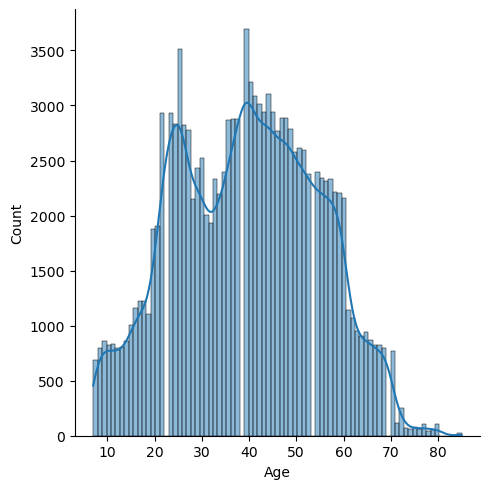

In [31]:
sns.displot(df_encoded["Age"], kde = True)

In [32]:
df_encoded["Age"].skew()

-0.003606211745335888

In [33]:
df["Departure Delay in Minutes"].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [34]:
df["Arrival Delay in Minutes"].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

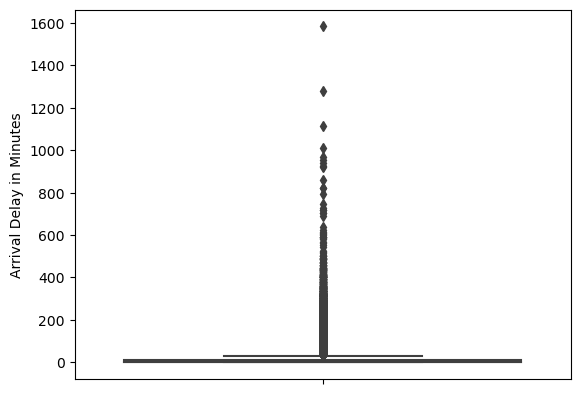

In [35]:
sns.boxplot(y="Arrival Delay in Minutes", data=df_encoded);

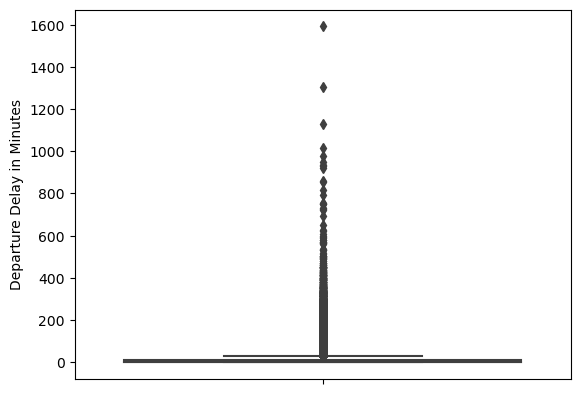

In [36]:
sns.boxplot(y="Departure Delay in Minutes", data=df_encoded);

In [37]:
df_encoded["Flight Distance"].skew()

1.1081423058353985

In [38]:
from sklearn import preprocessing

In [39]:
departure = df_encoded[["Departure Delay in Minutes"]] 
arrival = df_encoded[["Arrival Delay in Minutes"]] 

departure_normalized = preprocessing.normalize(departure, axis=0)
arrival_normalized = preprocessing.normalize(arrival, axis=0)

df_encoded["Departure Delay in Minutes"] = departure_normalized
df_encoded["Arrival Delay in Minutes"] = arrival_normalized

df_encoded.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_Neutral,Inflight wifi service_No opinion,Inflight wifi service_Satisfied,Inflight wifi service_Very dissatisfied,Inflight wifi service_Very satisfied,Departure/Arrival time convenient_Neutral,Departure/Arrival time convenient_No opinion,Departure/Arrival time convenient_Satisfied,Departure/Arrival time convenient_Very dissatisfied,Departure/Arrival time convenient_Very satisfied,Ease of Online booking_Neutral,Ease of Online booking_No opinion,Ease of Online booking_Satisfied,Ease of Online booking_Very dissatisfied,Ease of Online booking_Very satisfied,Gate location_Neutral,Gate location_No opinion,Gate location_Satisfied,Gate location_Very dissatisfied,Gate location_Very satisfied,Food and drink_Neutral,Food and drink_No opinion,Food and drink_Satisfied,Food and drink_Very dissatisfied,Food and drink_Very satisfied,Online boarding_Neutral,Online boarding_No opinion,Online boarding_Satisfied,Online boarding_Very dissatisfied,Online boarding_Very satisfied,Seat comfort_Neutral,Seat comfort_No opinion,Seat comfort_Satisfied,Seat comfort_Very dissatisfied,Seat comfort_Very satisfied,Inflight entertainment_Neutral,Inflight entertainment_No opinion,Inflight entertainment_Satisfied,Inflight entertainment_Very dissatisfied,Inflight entertainment_Very satisfied,On-board service_Neutral,On-board service_No opinion,On-board service_Satisfied,On-board service_Very dissatisfied,On-board service_Very satisfied,Leg room service_Neutral,Leg room service_No opinion,Leg room service_Satisfied,Leg room service_Very dissatisfied,Leg room service_Very satisfied,Baggage handling_Neutral,Baggage handling_Satisfied,Baggage handling_Very dissatisfied,Baggage handling_Very satisfied,Checkin service_Neutral,Checkin service_No opinion,Checkin service_Satisfied,Checkin service_Very dissatisfied,Checkin service_Very satisfied,Inflight service_Neutral,Inflight service_No opinion,Inflight service_Satisfied,Inflight service_Very dissatisfied,Inflight service_Very satisfied,Cleanliness_Neutral,Cleanliness_No opinion,Cleanliness_Satisfied,Cleanliness_Very dissatisfied,Cleanliness_Very satisfied
0,52.0,160.0,0.003399,0.002959,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,36.0,2863.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20.0,192.0,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44.0,3377.0,0.000000,0.000404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,49.0,1182.0,0.000000,0.001345,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
import sklearn.preprocessing as preproc

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
df_encoded["Flight Distance"]=preproc.minmax_scale(df_encoded[["Flight Distance"]])

In [43]:
df_encoded.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_Neutral,Inflight wifi service_No opinion,Inflight wifi service_Satisfied,Inflight wifi service_Very dissatisfied,Inflight wifi service_Very satisfied,Departure/Arrival time convenient_Neutral,Departure/Arrival time convenient_No opinion,Departure/Arrival time convenient_Satisfied,Departure/Arrival time convenient_Very dissatisfied,Departure/Arrival time convenient_Very satisfied,Ease of Online booking_Neutral,Ease of Online booking_No opinion,Ease of Online booking_Satisfied,Ease of Online booking_Very dissatisfied,Ease of Online booking_Very satisfied,Gate location_Neutral,Gate location_No opinion,Gate location_Satisfied,Gate location_Very dissatisfied,Gate location_Very satisfied,Food and drink_Neutral,Food and drink_No opinion,Food and drink_Satisfied,Food and drink_Very dissatisfied,Food and drink_Very satisfied,Online boarding_Neutral,Online boarding_No opinion,Online boarding_Satisfied,Online boarding_Very dissatisfied,Online boarding_Very satisfied,Seat comfort_Neutral,Seat comfort_No opinion,Seat comfort_Satisfied,Seat comfort_Very dissatisfied,Seat comfort_Very satisfied,Inflight entertainment_Neutral,Inflight entertainment_No opinion,Inflight entertainment_Satisfied,Inflight entertainment_Very dissatisfied,Inflight entertainment_Very satisfied,On-board service_Neutral,On-board service_No opinion,On-board service_Satisfied,On-board service_Very dissatisfied,On-board service_Very satisfied,Leg room service_Neutral,Leg room service_No opinion,Leg room service_Satisfied,Leg room service_Very dissatisfied,Leg room service_Very satisfied,Baggage handling_Neutral,Baggage handling_Satisfied,Baggage handling_Very dissatisfied,Baggage handling_Very satisfied,Checkin service_Neutral,Checkin service_No opinion,Checkin service_Satisfied,Checkin service_Very dissatisfied,Checkin service_Very satisfied,Inflight service_Neutral,Inflight service_No opinion,Inflight service_Satisfied,Inflight service_Very dissatisfied,Inflight service_Very satisfied,Cleanliness_Neutral,Cleanliness_No opinion,Cleanliness_Satisfied,Cleanliness_Very dissatisfied,Cleanliness_Very satisfied
0,52.0,0.026050,0.003399,0.002959,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,36.0,0.571890,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20.0,0.032512,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44.0,0.675687,0.000000,0.000404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,49.0,0.232431,0.000000,0.001345,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<span style="color: blue;">

### 3.4 Principal component analysis <a class="anchor" id="8th-bullet"></a>
    
</span>

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
fit = pca.fit_transform(df_encoded)

In [45]:
pca2 = PCA(.995)
fit = pca2.fit_transform(df_encoded)
pca2.explained_variance_

array([2.28635827e+02, 8.84581790e-01, 7.80538653e-01, 5.56729176e-01,
       5.18596590e-01, 4.90013338e-01, 4.68356504e-01, 4.00769945e-01,
       3.87728518e-01, 3.52977653e-01, 2.76500410e-01, 2.60675253e-01,
       2.52557954e-01, 2.37944550e-01, 2.26528099e-01, 2.15811997e-01,
       2.06366146e-01, 1.97712553e-01, 1.91263839e-01, 1.76462323e-01,
       1.70377747e-01, 1.66075880e-01, 1.64272812e-01, 1.42126337e-01,
       1.41493405e-01, 1.31506698e-01, 1.24632816e-01, 1.21581901e-01,
       1.09134408e-01, 1.04647958e-01, 1.01751265e-01, 9.87523318e-02,
       9.75047326e-02, 9.37817255e-02, 8.95279572e-02, 8.48750985e-02])

In [46]:
pca.n_components_

79

Text(0, 0.5, 'Eigenvalue')

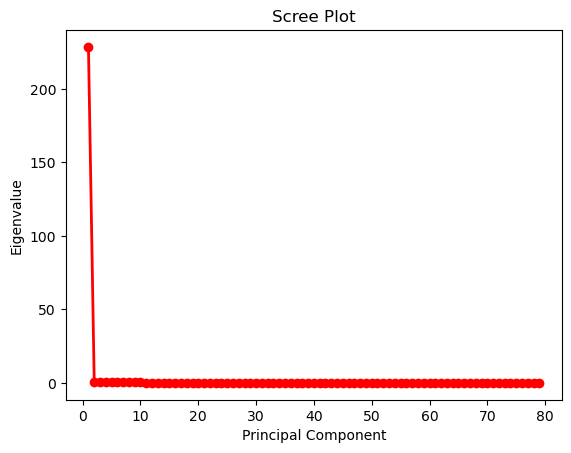

In [47]:
principal_component_number = np.arange(79) + 1
plt.plot(principal_component_number, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

<span style="color: blue;">

## 4. Mashine Learning Models <a class="anchor" id="ninth-bullet"></a>
    
</span>

<span style="color: blue;">

### 4.1 Naive Bayes <a class="anchor" id="10th-bullet"></a>
    
</span>

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [49]:
X = df_encoded.drop("satisfaction", axis=1) 
y = df_encoded["satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_Neutral,Inflight wifi service_No opinion,Inflight wifi service_Satisfied,Inflight wifi service_Very dissatisfied,Inflight wifi service_Very satisfied,Departure/Arrival time convenient_Neutral,Departure/Arrival time convenient_No opinion,Departure/Arrival time convenient_Satisfied,Departure/Arrival time convenient_Very dissatisfied,Departure/Arrival time convenient_Very satisfied,Ease of Online booking_Neutral,Ease of Online booking_No opinion,Ease of Online booking_Satisfied,Ease of Online booking_Very dissatisfied,Ease of Online booking_Very satisfied,Gate location_Neutral,Gate location_No opinion,Gate location_Satisfied,Gate location_Very dissatisfied,Gate location_Very satisfied,Food and drink_Neutral,Food and drink_No opinion,Food and drink_Satisfied,Food and drink_Very dissatisfied,Food and drink_Very satisfied,Online boarding_Neutral,Online boarding_No opinion,Online boarding_Satisfied,Online boarding_Very dissatisfied,Online boarding_Very satisfied,Seat comfort_Neutral,Seat comfort_No opinion,Seat comfort_Satisfied,Seat comfort_Very dissatisfied,Seat comfort_Very satisfied,Inflight entertainment_Neutral,Inflight entertainment_No opinion,Inflight entertainment_Satisfied,Inflight entertainment_Very dissatisfied,Inflight entertainment_Very satisfied,On-board service_Neutral,On-board service_No opinion,On-board service_Satisfied,On-board service_Very dissatisfied,On-board service_Very satisfied,Leg room service_Neutral,Leg room service_No opinion,Leg room service_Satisfied,Leg room service_Very dissatisfied,Leg room service_Very satisfied,Baggage handling_Neutral,Baggage handling_Satisfied,Baggage handling_Very dissatisfied,Baggage handling_Very satisfied,Checkin service_Neutral,Checkin service_No opinion,Checkin service_Satisfied,Checkin service_Very dissatisfied,Checkin service_Very satisfied,Inflight service_Neutral,Inflight service_No opinion,Inflight service_Satisfied,Inflight service_Very dissatisfied,Inflight service_Very satisfied,Cleanliness_Neutral,Cleanliness_No opinion,Cleanliness_Satisfied,Cleanliness_Very dissatisfied,Cleanliness_Very satisfied
0,52.0,0.026050,0.003399,0.002959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,36.0,0.571890,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20.0,0.032512,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44.0,0.675687,0.000000,0.000404,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,49.0,0.232431,0.000000,0.001345,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("Confusion Matrix:")
print(cm)
print("Accuracy is:", accuracy)

Confusion Matrix:
[[ 9109  5625]
 [  605 10637]]
Accuracy is: 0.7601632275947028


<span style="color: blue;">

### 4.2 Random Forest <a class="anchor" id="11th-bullet"></a>
    
</span>

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [53]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [54]:
r= RandomForestRegressor()

In [55]:
r.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
y_pred=r.predict(X_test)

<AxesSubplot:xlabel='Importance', ylabel='Feature Name'>

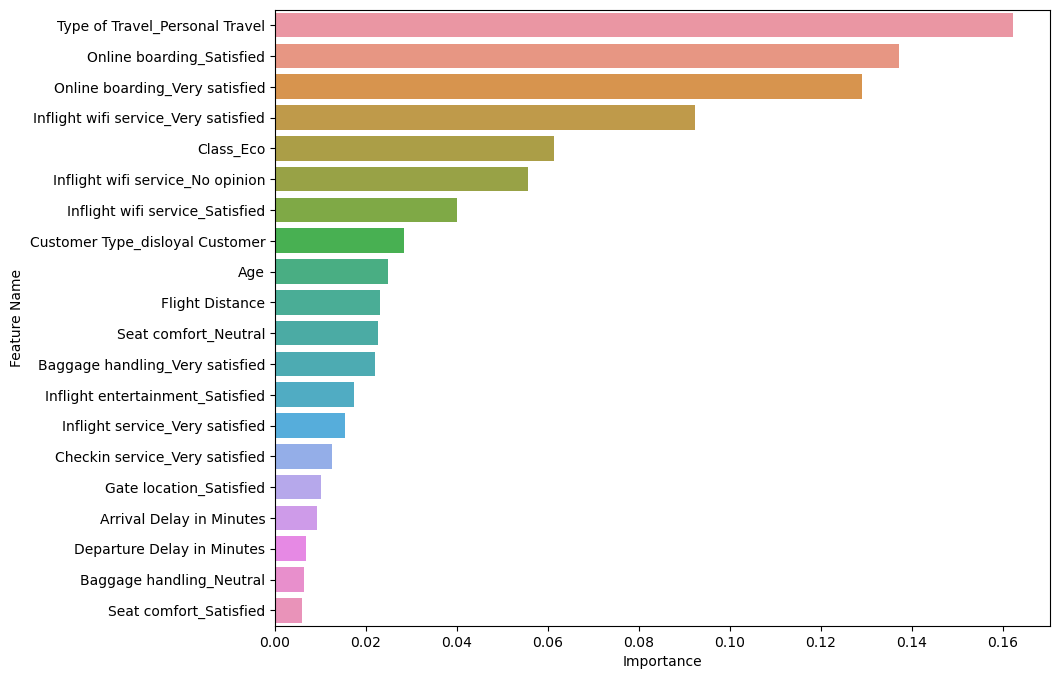

In [57]:
imp_df= pd.DataFrame({"Feature Name" :X_train.columns,
                    "Importance" : r.feature_importances_ 
                     })
fi=imp_df.sort_values(by="Importance",ascending=False)
fi2=fi.head(20)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance' , y= 'Feature Name')

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [60]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy is:", accuracy)

Confusion Matrix:
[[14322   290]
 [  764 10600]]
Accuracy is: 0.9594240837696335


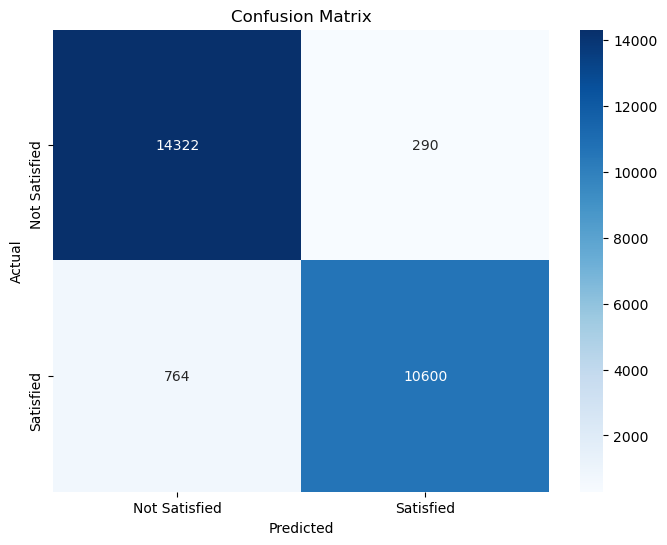

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0])
print("Confusion Matrix:")
print(cm)
print("Accuracy is:", accuracy)

Confusion Matrix:
[[14322   290]
 [  764 10600]]
Accuracy is: 0.9594240837696335


In [63]:
# this may not be needed

In [64]:
standard_columns = df_encoded[["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]]
df_encoded[["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]] = (standard_columns - standard_columns.mean())/standard_columns.std()
df_encoded

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_Neutral,Inflight wifi service_No opinion,Inflight wifi service_Satisfied,Inflight wifi service_Very dissatisfied,Inflight wifi service_Very satisfied,Departure/Arrival time convenient_Neutral,Departure/Arrival time convenient_No opinion,Departure/Arrival time convenient_Satisfied,Departure/Arrival time convenient_Very dissatisfied,Departure/Arrival time convenient_Very satisfied,Ease of Online booking_Neutral,Ease of Online booking_No opinion,Ease of Online booking_Satisfied,Ease of Online booking_Very dissatisfied,Ease of Online booking_Very satisfied,Gate location_Neutral,Gate location_No opinion,Gate location_Satisfied,Gate location_Very dissatisfied,Gate location_Very satisfied,Food and drink_Neutral,Food and drink_No opinion,Food and drink_Satisfied,Food and drink_Very dissatisfied,Food and drink_Very satisfied,Online boarding_Neutral,Online boarding_No opinion,Online boarding_Satisfied,Online boarding_Very dissatisfied,Online boarding_Very satisfied,Seat comfort_Neutral,Seat comfort_No opinion,Seat comfort_Satisfied,Seat comfort_Very dissatisfied,Seat comfort_Very satisfied,Inflight entertainment_Neutral,Inflight entertainment_No opinion,Inflight entertainment_Satisfied,Inflight entertainment_Very dissatisfied,Inflight entertainment_Very satisfied,On-board service_Neutral,On-board service_No opinion,On-board service_Satisfied,On-board service_Very dissatisfied,On-board service_Very satisfied,Leg room service_Neutral,Leg room service_No opinion,Leg room service_Satisfied,Leg room service_Very dissatisfied,Leg room service_Very satisfied,Baggage handling_Neutral,Baggage handling_Satisfied,Baggage handling_Very dissatisfied,Baggage handling_Very satisfied,Checkin service_Neutral,Checkin service_No opinion,Checkin service_Satisfied,Checkin service_Very dissatisfied,Checkin service_Very satisfied,Inflight service_Neutral,Inflight service_No opinion,Inflight service_Satisfied,Inflight service_Very dissatisfied,Inflight service_Very satisfied,Cleanliness_Neutral,Cleanliness_No opinion,Cleanliness_Satisfied,Cleanliness_Very dissatisfied,Cleanliness_Very satisfied
0,0.831520,-1.032948,0.926852,0.753703,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.226726,1.676956,-0.386480,-0.391642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.284972,-1.000866,-0.386480,-0.391642,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.302397,2.192268,-0.386480,-0.235459,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.633098,-0.008338,-0.386480,0.128969,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,